# Network simulator

This notebooks contains an example of a network model simulator


In [1]:

%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

import numpy as np

from rf_network_simulator.network_simulator import NetworkSimulator,RenderingOptions
from rf_network_simulator.rf_network import NodesDistributionParams
from rf_network_simulator import propogation_models as pmodels
from rf_network_simulator import simple_height_map_generator as hmgen
from rf_network_simulator.rf_network import NodeTypeDistribution


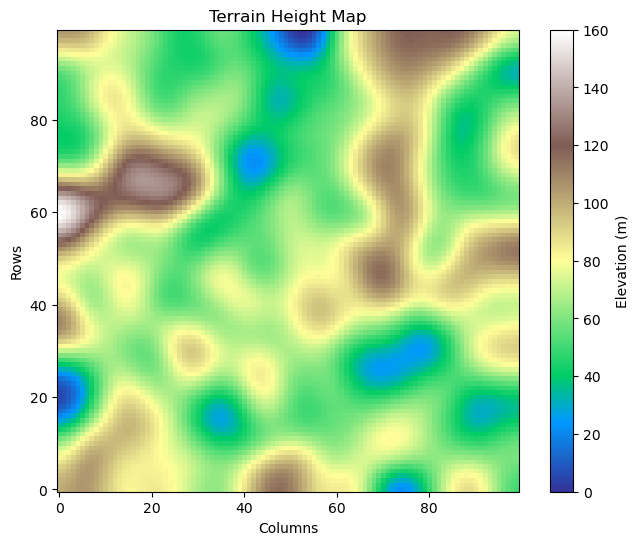

In [2]:
terrain_map = hmgen.generate_terrain_height_map(size=(100, 100), max_elevation=160, smoothness=5)
hmgen.visualize_terrain_height_map(terrain_map)


In [3]:
import os
import git
from os import path as osp
import datetime
from rf_network_simulator.configurator import create_simulator_from_yaml




Processing: 100%|██████████| 1800/1800 [11:46<00:00,  2.55it/s, accuracy=0.54, precision=0.881, recall=0.583, islands_accuracy=0.887] 


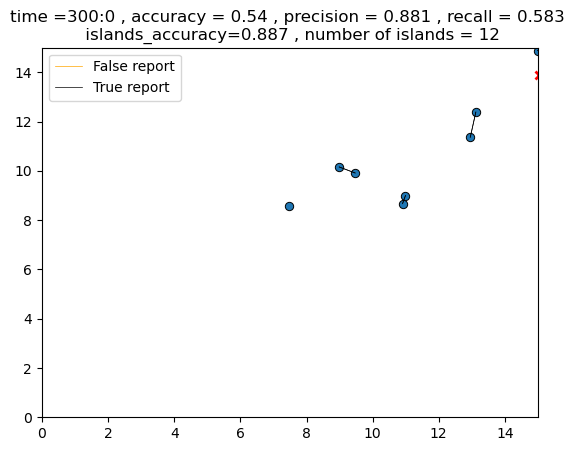

In [18]:


sim,experiment_folder=create_simulator_from_yaml()

res=sim.full_simulation()

res._to_yaml(osp.join(experiment_folder,"res_statistics.yaml"))





In [30]:
from rf_network_simulator.rf_network import create_distance_matrix


node = sim.nodes[0]

d = create_distance_matrix(sim.nodes)





In [18]:
from rf_network_simulator import propogation_models

model =propogation_models.PropogationModelEgli()

res=model(np.array([0,0])[None,:],np.array([2.0,0])[None,:],200,np.array([2.5]),np.array([2.5]))
print(res)

[130.14419939]


In [23]:

from itertools import product
from rf_network_simulator.configurator import create_config_from_yaml, create_experiments_folder, create_simulator_from_params


np.random.seed(1)

iterations = 2

iterations_seeds = np.random.randint(0,10000,size=(iterations))

params = create_config_from_yaml("params.yaml")
experiment_folder = create_experiments_folder(params)

params.create_video=False
sweep_number_of_nodes = [20,40,60]
vehicles_precentage=[0.0,0.25]
for i,(number_of_nodes,vehicles_num,ex_id) in enumerate(product(sweep_number_of_nodes,vehicles_precentage,range(iterations))):
    params.seed=int(iterations_seeds[ex_id])
    params.number_of_total_nodes=number_of_nodes
    params.percentage_of_vehicles=vehicles_num
    params._to_yaml(osp.join(experiment_folder,f"params_{i:04}.yaml"))

    sim = create_simulator_from_params(params, experiment_folder)
    res=sim.full_simulation()

    res._to_yaml(osp.join(experiment_folder,f"res_statistics_{i:04}.yaml"))



Processing: 100%|██████████| 1800/1800 [00:22<00:00, 80.29it/s, accuracy=0.512, precision=0.874, recall=0.553, islands_accuracy=0.923] 
